In [ ]:
!pip install pymorphy2

In [391]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/e4/43/fd3cd5989d6b592af1c2e4f37bf887f74b790f10b568b2497fe874a67fc7/matplotlib-3.8.3-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/fd/7c/168f8343f33d861305e18c56901ef1bb675d3c7f977f435ec72751a71a54/contourpy-1.2.0-cp310-cp310-win_amd64.whl.metadata
  Using cached contourpy-1.2.0-cp310-cp310-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/98/aa/482ce7af3fd572121a673d9af4b73901cb0ee29b676aaf576fd67856e9fe/fonttools-4.49.0-cp310-cp310-win_amd64.whl.metadata
   


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import json
import re
import pymorphy2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
EDU_DATA_PATH = '../data/case_2_reference_without_resume_sorted.json'
edu_data = json.load(open(EDU_DATA_PATH, 'r', encoding='utf-8'))

In [3]:
edu_data = edu_data

In [4]:
morph = pymorphy2.MorphAnalyzer()

In [25]:
def clear_string(string):
    string = re.sub('[\.\,\;\(\)\—\–\\\/\:\•\«\»\!\?\_\n\t\"“]', ' ', string).replace('-', '')
    string = re.sub(' [-0-9]+ ', ' ', string)
    string = re.sub('[ ]+', ' ', string)
    # string = ' '.join(morph.parse(word)[0].normal_form for word in string)
    return string.strip()


In [26]:
def unite_person_data():
    result = []
    experience_keys = ('starts', 'ends', 'employer', 'city', 'position', 'description')
    education_keys = ('year', 'organization', 'faculty', 'specialty', 'result', 'education_type', 'education_level')
    vacancy = {}
    row = edu_data
    for key in row['vacancy']:
        vacancy[f'vacancy_{key}'] = row['vacancy'][key]
    person = {}
    for person_info in row['resumes']:
        for key in person_info:
            person[f'person_{key}'] = person_info[key]
        experience = ''
        for experience_item in person_info.get('experienceItem', {}):
            experience += ' '.join([str(experience_item[key]) for key in experience_keys])
        education = ''
        for education_item in person_info.get('educationItem', {}):
            education += ' '.join([str(education_item[key]) for key in education_keys])
        person['person_experienceItem'] = clear_string(experience)
        person['person_educationItem'] = clear_string(education)
        result.append(vacancy | person)
    return result

In [27]:
arr = unite_person_data()
print(arr[0])

{'vacancy_uuid': '8b9c8d16-c7f0-38a2-b80c-d94030c15a6f', 'vacancy_name': 'Java разработчик', 'vacancy_keywords': 'Kafka, Java, RxJava, Hystrix, MongoDB ', 'vacancy_description': 'Требования: 4+ года опыта работы с Java 8+ или Kotlin 4+ года опыта работы с Spring и 2+ год работы с Spring Boot. Опыт работы с системами на микросервисной архитектуре (Spring Cloud, Kubernetes, Openshift или аналоги). Опыт работы с Docker. Опыт работы с 3-мя любыми из следующих технологий NoSQL (MongoDB, Elasticsearch, аналоги) SQL (PostgreSQL, Oracle, аналоги) Брокеры сообщений (Kafka, RabbitMQ, аналоги) Reactive programming (RxJava, Project Reactor) Cache (Redis, Hazelcast). Настройка CI/CD (GitlabCI, Jenkins, аналоги). Настройка средств мониторинга (Zabbix, Prometheus). Настройка средств логирования (Graylog, ELK). Будет хорошо, если кандидат: Знает все технологии из первого пункта; Участвовал в проработке архитектуры и может объяснить все решения на своем проекте; Готов драйвить техническое развитие сист

In [28]:
print(len(arr))

113


In [29]:
arr[0].keys()

dict_keys(['vacancy_uuid', 'vacancy_name', 'vacancy_keywords', 'vacancy_description', 'vacancy_comment', 'person_uuid', 'person_first_name', 'person_last_name', 'person_birth_date', 'person_country', 'person_city', 'person_about', 'person_key_skills', 'person_experienceItem', 'person_languageItems', 'person_educationItem'])

In [30]:
key_skills = set()

In [33]:
for row in arr:
    key_skills |= set([clear_string(word).lower().replace(', ', '').strip() for word in
                       (row.get('person_key_skills') or '').split(', ')])
sorted(key_skills)[-10:]

['разработка решений по интеграции',
 'реактивное программирование',
 'руководство коллективом',
 'серверное программирование',
 'системы идентификации и аутентификации',
 'субд',
 'умение работать в команде',
 'управление разработкой',
 'целеустремленность',
 'шаблоны проектирования']

In [34]:
open('key_skills_exam.txt', 'w', encoding='utf-8').write('\n'.join(sorted(key_skills)[1:]))

5142

In [35]:
len(key_skills)

427

In [36]:
category = 'person_key_skills'
df = pd.DataFrame(arr)
df[category]

0      Java Core, Spring Framework, Hibernate ORM, Po...
1      Java 8-17, Java SE, Java EE, Spring Framework ...
2      Java 8 и 11, osgi, postgresql, testng, mockito...
3      Java EE, Spring Framework, Intellij IDEA, Рабо...
4                                                   None
                             ...                        
108                                                 None
109    Java Servlets, Hibernate ORM, SOAP, REST, Spri...
110    Ответственность, Коммуникабельность, Аналитиче...
111    Linux, Apache Maven, Java Collections, Java EE...
112                        Kotlin, Java, Project Reactor
Name: person_key_skills, Length: 113, dtype: object

In [37]:
key_skills = list(key_skills)
binary_data = df.to_dict('records')
for row in binary_data:
    for skill in key_skills:
        row[skill] = skill in (row[category] or '').lower()
binary_df = pd.DataFrame(binary_data)
binary_df.pop(category)

0      Java Core, Spring Framework, Hibernate ORM, Po...
1      Java 8-17, Java SE, Java EE, Spring Framework ...
2      Java 8 и 11, osgi, postgresql, testng, mockito...
3      Java EE, Spring Framework, Intellij IDEA, Рабо...
4                                                   None
                             ...                        
108                                                 None
109    Java Servlets, Hibernate ORM, SOAP, REST, Spri...
110    Ответственность, Коммуникабельность, Аналитиче...
111    Linux, Apache Maven, Java Collections, Java EE...
112                        Kotlin, Java, Project Reactor
Name: person_key_skills, Length: 113, dtype: object

In [38]:
len(binary_df[binary_df['ооп'] == True])

23

In [39]:
binary_df['ооп']

0      False
1      False
2      False
3       True
4      False
       ...  
108    False
109    False
110    False
111     True
112    False
Name: ооп, Length: 113, dtype: bool

In [40]:
skill_frequencies = {}
for skill in key_skills:
    skill_frequencies[skill] = len(binary_df[binary_df[skill]])


In [41]:
binary_df.columns

Index(['vacancy_uuid', 'vacancy_name', 'vacancy_keywords',
       'vacancy_description', 'vacancy_comment', 'person_uuid',
       'person_first_name', 'person_last_name', 'person_birth_date',
       'person_country',
       ...
       'разработка по', 'gitlab', 'apache tomcat', 'postman', 'jasperreports',
       'git java spring framework apache maven spring boot spring data gradle postgresql sql junit',
       'java script', 'spring boot 2', 'ejb', 'solr'],
      dtype='object', length=443)

In [43]:
binary_df.plot(kind='density')
binary_df.columns

TypeError: no numeric data to plot

In [45]:
def update_key(unique_key):
    skills_to_plot[unique_key] = sum(skills_to_plot[key] for key in skills_to_plot if unique_key in key)
    [skills_to_plot.pop(key) for key in tuple(skills_to_plot.keys()) if unique_key in key and unique_key != key]

In [47]:
skills_to_plot = {}
for skill in sorted(skill_frequencies.items(), key=lambda x: x[1])[:-1]:
    skills_to_plot[skill[0]] = skill[1]
    key = skill[0]
    if key in skill[0]:
        print(skills_to_plot.get(skill[0]))
        update_key(key)


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
6
6
7
7
7
7
7
8
8
8
8
8
8
8
8
9
9
9
10
10
10
10
11
11
11
12
12
12
12
12
13
14
14
14
14
15
16
16
16
16
16
16
17
17
17
18
18
19
20
20
20
21
23
23
23
23
24
24
24
25
26
27
29
31
32
34
36
39
41
43
50
54
56
56
56
56
62
62
63
72
74
78
90
95
101


In [53]:
skills_to_plot_1 = skills_to_plot.copy()
to_remove = ('r', 'c', 'ирование', 'atlassian', 'di', 'bi', 'boot', 'mq')
to_remove = []
[skills_to_plot_1.pop(key) for key in to_remove]
sorted(skills_to_plot_1.items(), key=lambda x: x[1])[:10]

[('jni jna для интеграции с низкоуровневым кодом', 0),
 ('clickteam fusion 5', 0),
 ('ci cd', 0),
 ('vert x', 0),
 ('mtls ssl', 0),
 ('базовые знания многопоточности threads', 0),
 ('ignite', 1),
 ('открытый к новой информации', 1),
 ('argocd', 1),
 ('qt', 1)]

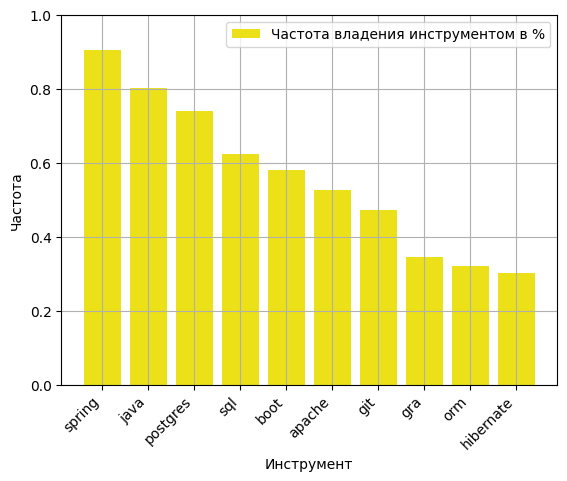

113


In [86]:
to_plot = sorted(skills_to_plot_1.items(), key=lambda x: x[1])[-10:][::-1]
x = [v[0] for v in to_plot]
y = [v[1] * .55 / len(df) for v in to_plot]
# plt.title
plt.grid()
plt.ylim(0, 1)
plt.bar(x, y, color='#ece118', label='Частота владения инструментом в %')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.xlabel('Инструмент')
plt.ylabel('Частота')
plt.savefig('bar.png', format='png', bbox_inches='tight')
plt.show()
print(len(df))

In [87]:
for i in top_ind[:10]:
  print(df["id_resume"][i])
with open("ans.txt", "w",encoding="utf-8") as f:
  for i in top_ind[:10]:
    f.write(str(df["id_resume"][i])+"\n")


NameError: name 'top_ind' is not defined